# Librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Obtención del dataset

In [2]:
from sklearn import datasets
iris = datasets.load_iris()

# Valores del ancho y largo de los pétalos

In [3]:
X = iris["data"][:, (2,3)]

# Función sigmoide

In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Para la setosa

## Clasificación de la setosa (Clase 0)

In [5]:
y = (iris["target"] == 0).astype(int).reshape((len(iris.target), 1))

### Obtención de los datos de entrenamiento y de prueba

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.2, random_state=30)

## Creación del la matriz con columna de unos

In [8]:
X_b = np.c_[np.ones((len(y_train), 1)), X_train]

In [9]:
eta = 0.01
n_iteration = 200000

In [10]:
theta1 = np.random.randn(3, 1)
theta1

array([[-1.27180708],
       [-0.06291379],
       [ 1.56161131]])

## Gradient Descent

In [11]:
for i in range(n_iteration):
    gradients = (1/len(y_train)) * (X_b.T @ (sigmoid(X_b @ theta1) - y_train))
    theta1 = theta1 - eta * gradients
theta1

array([[11.01731125],
       [-3.28602043],
       [-3.69971666]])

## Grafica de la clasificación

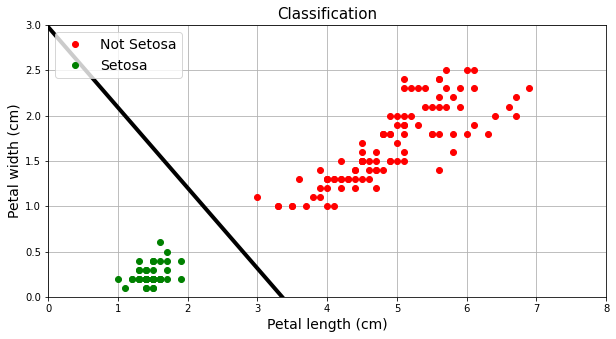

In [12]:
X = iris["data"][:, (2,3)]
y = (iris["target"] == 0).astype(int)

plt.figure(figsize=(10,5))
plt.plot(X[y == 0, 0], X[y == 0, 1], "ro", label = "Not Setosa")
plt.plot(X[y == 1, 0], X[y == 1, 1], "go", label = "Setosa")

x_line = np.array([0,8])
decision_boundary = -(theta1[0] + theta1[1] * x_line) / theta1[2]

plt.plot(x_line, decision_boundary, "k", linewidth = 4)

plt.xlabel("Petal length (cm)", fontsize = 14)
plt.ylabel("Petal width (cm)", fontsize = 14)
plt.legend(loc = "upper left", fontsize = 14)
plt.axis([0, 8, 0, 3])
plt.grid()
plt.title('Classification', fontsize = 15)
plt.show()

# Predicción con los pesos obtenidos

## Fit

In [13]:
X_fit = np.c_[np.ones((len(y_test), 1)), X_test]
y_predicted1 = sigmoid(X_fit @ theta1)

## Predicción

In [14]:
y_test.reshape(1, -1)

array([[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
        1, 1, 0, 0, 0, 0, 1, 0]])

In [15]:
(y_predicted1 >= 0.5).astype(int).reshape(1, -1)

array([[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
        1, 1, 0, 0, 0, 0, 1, 0]])

In [16]:
(y_predicted1 >= 0.5).astype(int).reshape(1, -1) == y_test.reshape(1, -1)

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True]])

# Para la versicolor

## Clasificación de la versicolor (Clase 1)

In [17]:
y = (iris["target"] == 1).astype(int).reshape((len(iris.target), 1))

## Obtención de los datos de entrenamiento y de prueba

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.2, random_state=30)

## Creación de la matriz con columna de unos

In [19]:
X_b = np.c_[np.ones((len(y_train), 1)), X_train]

In [20]:
eta = 0.01
n_iteration = 200000

In [21]:
theta2 = np.random.randn(3, 1)
theta2

array([[0.97812383],
       [1.81267173],
       [0.12561916]])

## Gradient Descent

In [22]:
for i in range(n_iteration):
    gradients = (1/len(y_train)) * (X_b.T @ (sigmoid(X_b @ theta2) - y_train))
    theta2 = theta2 - eta * gradients
theta2

array([[-2.89834794],
       [ 1.7208119 ],
       [-3.5840192 ]])

## Gráfica de la clasificación

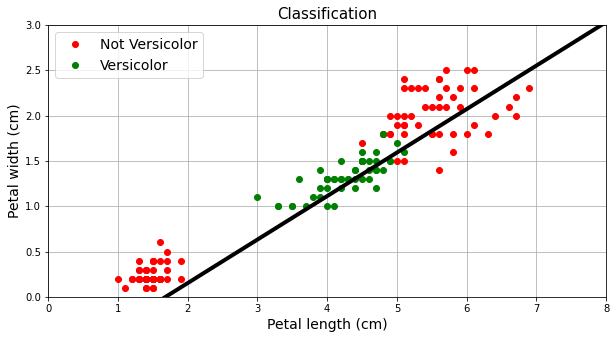

In [23]:
X = iris["data"][:, (2,3)]
y = (iris["target"] == 1).astype(int)

plt.figure(figsize=(10,5))
plt.plot(X[y == 0, 0], X[y == 0, 1], "ro", label = "Not Versicolor")
plt.plot(X[y == 1, 0], X[y == 1, 1], "go", label = "Versicolor")

x_line = np.array([0,8])
decision_boundary = -(theta2[0] + theta2[1] * x_line) / theta2[2]

plt.plot(x_line, decision_boundary, "k", linewidth = 4)

plt.xlabel("Petal length (cm)", fontsize = 14)
plt.ylabel("Petal width (cm)", fontsize = 14)
plt.legend(loc = "upper left", fontsize = 14)
plt.axis([0, 8, 0, 3])
plt.grid()
plt.title('Classification', fontsize = 15)
plt.show()

# Predicción con los pesos obtenidos

## Fit

In [24]:
X_fit = np.c_[np.ones((len(y_test), 1)), X_test]
y_predicted2 = sigmoid(X_fit @ theta2)

## Predicción

In [25]:
y_test.reshape(1, -1)

array([[0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 1]])

In [26]:
(y_predicted2 >= 0.5).astype(int).reshape(1, -1)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
        0, 0, 1, 0, 0, 0, 0, 1]])

In [27]:
(y_predicted2 >= 0.5).astype(int).reshape(1, -1) == y_test.reshape(1, -1)

array([[ True,  True,  True,  True, False, False,  True,  True, False,
        False,  True, False, False, False,  True, False,  True,  True,
         True,  True, False,  True,  True,  True, False,  True, False,
         True,  True,  True]])

# Para Virginica

## Clasificación de la virginica (Clase 2)

In [28]:
y = (iris["target"] == 2).astype(int).reshape((len(iris.target), 1))

## Obtención de los datos de entrenamiento y de prueba

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.2, random_state=30)

## Creación de la matriz con columnas de unos

In [30]:
X_b = np.c_[np.ones((len(y_train), 1)), X_train]

In [31]:
eta = 0.01
n_iteration = 200000

In [32]:
theta3 = np.random.randn(3, 1)
theta3

array([[0.67175853],
       [0.43908411],
       [0.1726708 ]])

## Gradient Descent

In [33]:
for i in range(n_iteration):
    gradients = (1/len(y_train)) * (X_b.T @ (sigmoid(X_b @ theta3) - y_train))
    theta3 = theta3 - eta * gradients
theta3

array([[-18.39690974],
       [  1.36391457],
       [  7.15502739]])

## Gráfica de la clasificación

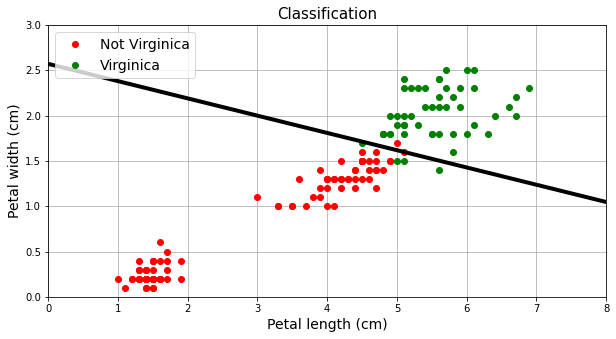

In [34]:
X = iris["data"][:, (2,3)]
y = (iris["target"] == 2).astype(int)

plt.figure(figsize=(10,5))
plt.plot(X[y == 0, 0], X[y == 0, 1], "ro", label = "Not Virginica")
plt.plot(X[y == 1, 0], X[y == 1, 1], "go", label = "Virginica")

x_line = np.array([0,8])
decision_boundary = -(theta3[0] + theta3[1] * x_line) / theta3[2]

plt.plot(x_line, decision_boundary, "k", linewidth = 4)

plt.xlabel("Petal length (cm)", fontsize = 14)
plt.ylabel("Petal width (cm)", fontsize = 14)
plt.legend(loc = "upper left", fontsize = 14)
plt.axis([0, 8, 0, 3])
plt.grid()
plt.title('Classification', fontsize = 15)
plt.show()

# Predicción con los pesos obtenidos

## Fit

In [35]:
X_fit = np.c_[np.ones((len(y_test), 1)), X_test]
y_predicted3 = sigmoid(X_fit @ theta3)

In [36]:
y_test.reshape(1, -1)

array([[0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 1, 1, 0, 1, 0, 0]])

In [37]:
(y_predicted3 >= 0.5).astype(int).reshape(1, -1)

array([[0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 0, 0]])

In [38]:
(y_predicted3 >= 0.5).astype(int).reshape(1, -1) == y_test.reshape(1, -1)

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True, False,  True,  True,  True,  True,  True, False,
         True,  True,  True]])

# Resultado Final One vs All

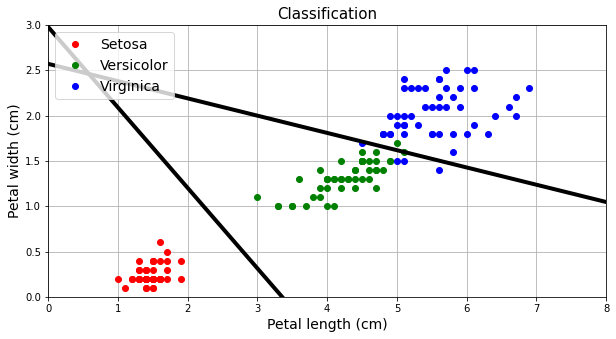

In [39]:
X = iris["data"][:, (2,3)]
y = iris["target"].astype(int)

plt.figure(figsize=(10,5))
plt.plot(X[y == 0, 0], X[y == 0, 1], "ro", label = "Setosa")
plt.plot(X[y == 1, 0], X[y == 1, 1], "go", label = "Versicolor")
plt.plot(X[y == 2, 0], X[y == 2, 1], "bo", label = "Virginica")


x_line = np.array([0,8])
decision_boundary0 = -(theta1[0] + theta1[1] * x_line) / theta1[2]
decision_boundary1 = -(theta3[0] + theta3[1] * x_line) / theta3[2]

plt.plot(x_line, decision_boundary0, "k", linewidth = 4)
plt.plot(x_line, decision_boundary1, "k", linewidth = 4)

plt.xlabel("Petal length (cm)", fontsize = 14)
plt.ylabel("Petal width (cm)", fontsize = 14)
plt.legend(loc = "upper left", fontsize = 14)
plt.axis([0, 8, 0, 3])
plt.grid()
plt.title('Classification', fontsize = 15)
plt.show()

# Matriz de comparación

In [40]:
y_one_vs_all = np.concatenate((y_predicted1, y_predicted2, y_predicted3), axis = 1)

In [41]:
(y_one_vs_all >= 0.5).astype(int)

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 0],
       [0, 1, 1],
       [1, 0, 0],
       [0, 1, 1],
       [0, 0, 0],
       [0, 0, 0],
       [1, 0, 0],
       [0, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0]])

# One vs One 

## Setosa vs Versicolor (Clase 0 vs Clase 1)

In [42]:
X = iris["data"][:, (2,3)]
X


array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [43]:
y = iris["target"].astype(int)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Filtro de datos

In [44]:
X = X[y < 2]
X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [45]:
y = y[y < 2]
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [46]:
y = y.reshape((len(y)), 1)
y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [47]:
y = (y == 0).astype(int)
y

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

## Obtención de datos de entrenamiento y de prueba

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.2, random_state=30)

## Creación de matriz con columna de unos

In [49]:
X_b = np.c_[np.ones((len(y_train), 1)), X_train]

In [50]:
eta = 0.01
n_iteration = 200000

In [51]:
theta1 = np.random.randn(3, 1)
theta1

array([[2.43950999],
       [0.82520082],
       [0.04035775]])

## Gradient Descent

In [52]:
for i in range(n_iteration):
    gradients = (1/len(y_train)) * (X_b.T @ (sigmoid(X_b @ theta1) - y_train))
    theta1 = theta1 - eta * gradients
theta1

array([[12.00244076],
       [-3.42977276],
       [-4.62909608]])

## Gráfica de la clasificación

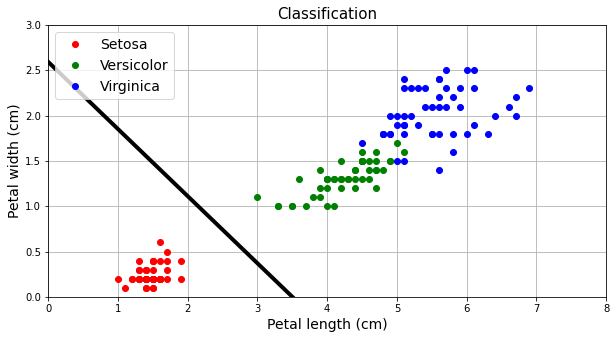

In [53]:
X = iris["data"][:, (2,3)]
y = iris["target"].astype(int)

plt.figure(figsize=(10,5))
plt.plot(X[y == 0, 0], X[y == 0, 1], "ro", label = "Setosa")
plt.plot(X[y == 1, 0], X[y == 1, 1], "go", label = "Versicolor")
plt.plot(X[y == 2, 0], X[y == 2, 1], "bo", label = "Virginica")


x_line = np.array([0,8])
decision_boundary = -(theta1[0] + theta1[1] * x_line) / theta1[2]

plt.plot(x_line, decision_boundary, "k", linewidth = 4)

plt.xlabel("Petal length (cm)", fontsize = 14)
plt.ylabel("Petal width (cm)", fontsize = 14)
plt.legend(loc = "upper left", fontsize = 14)
plt.axis([0, 8, 0, 3])
plt.grid()
plt.title('Classification', fontsize = 15)
plt.show()

# Predicción con los pesos obtenidos

## Fit

In [54]:
X_fit = np.c_[np.ones((len(y_test), 1)), X_test]
y_predicted1 = sigmoid(X_fit @ theta1)

In [55]:
y_test.reshape(1, -1)

array([[1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1]])

In [56]:
(y_predicted1 >= 0.5).astype(int).reshape(1, -1)

array([[1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1]])

In [57]:
(y_predicted1 >= 0.5).astype(int).reshape(1, -1) == y_test.reshape(1, -1)

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True]])

## Setosa vs Virginica (Clase 0 vs Clase 2)

In [58]:
X = iris["data"][:, (2,3)]
X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [59]:
y = iris["target"].astype(int)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Filtro de datos

In [60]:
X = X[y != 1]
X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [6. , 2.5],
       [5.1, 1.9],
       [5.9,

In [61]:
y = y[y != 1]
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [62]:
y = y.reshape((len(y)), 1)
y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
    

In [63]:
y = (y == 0).astype(int)
y

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

## Obtención de datos de entrenamiento y de prueba

In [64]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.2, random_state=30)

## Creación de matriz con columna de unos

In [65]:
X_b = np.c_[np.ones((len(y_train), 1)), X_train]

In [66]:
eta = 0.01
n_iteration = 200000

In [67]:
theta2 = np.random.randn(3, 1)
theta2

array([[ 0.2365501 ],
       [-1.28473549],
       [-0.12848038]])

## Gradient Descent

In [68]:
for i in range(n_iteration):
    gradients = (1/len(y_train)) * (X_b.T @ (sigmoid(X_b @ theta2) - y_train))
    theta2 = theta2 - eta * gradients
theta2

array([[10.01294678],
       [-1.93010878],
       [-3.77125927]])

## Gráfica de la clasificación

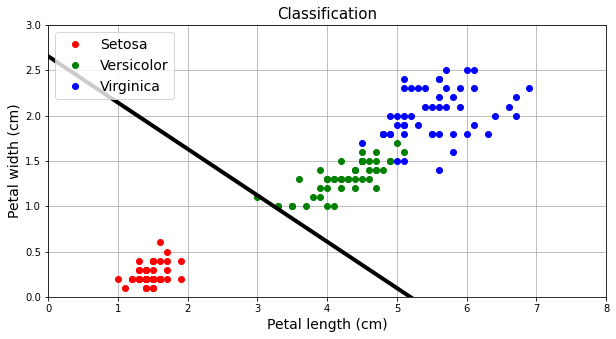

In [69]:
X = iris["data"][:, (2,3)]
y = iris["target"].astype(int)

plt.figure(figsize=(10,5))
plt.plot(X[y == 0, 0], X[y == 0, 1], "ro", label = "Setosa")
plt.plot(X[y == 1, 0], X[y == 1, 1], "go", label = "Versicolor")
plt.plot(X[y == 2, 0], X[y == 2, 1], "bo", label = "Virginica")


x_line = np.array([0,8])
decision_boundary = -(theta2[0] + theta2[1] * x_line) / theta2[2]

plt.plot(x_line, decision_boundary, "k", linewidth = 4)

plt.xlabel("Petal length (cm)", fontsize = 14)
plt.ylabel("Petal width (cm)", fontsize = 14)
plt.legend(loc = "upper left", fontsize = 14)
plt.axis([0, 8, 0, 3])
plt.grid()
plt.title('Classification', fontsize = 15)
plt.show()

# Predicción con los pesos obtenidos

## Fit

In [70]:
X_fit = np.c_[np.ones((len(y_test), 1)), X_test]
y_predicted2 = sigmoid(X_fit @ theta2)

In [71]:
y_test.reshape(1, -1)

array([[1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1]])

In [72]:
(y_predicted2 >= 0.5).astype(int).reshape(1, -1)

array([[1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1]])

In [73]:
(y_predicted2 >= 0.5).astype(int).reshape(1, -1) == y_test.reshape(1, -1)

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True]])

## Versicolor vs Virginica (Clase 1 vs Clase 2)

In [74]:
X = iris["data"][:, (2,3)]
X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [75]:
y = iris["target"].astype(int)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Filtro de datos

In [76]:
X = X[y > 0]
X

array([[4.7, 1.4],
       [4.5, 1.5],
       [4.9, 1.5],
       [4. , 1.3],
       [4.6, 1.5],
       [4.5, 1.3],
       [4.7, 1.6],
       [3.3, 1. ],
       [4.6, 1.3],
       [3.9, 1.4],
       [3.5, 1. ],
       [4.2, 1.5],
       [4. , 1. ],
       [4.7, 1.4],
       [3.6, 1.3],
       [4.4, 1.4],
       [4.5, 1.5],
       [4.1, 1. ],
       [4.5, 1.5],
       [3.9, 1.1],
       [4.8, 1.8],
       [4. , 1.3],
       [4.9, 1.5],
       [4.7, 1.2],
       [4.3, 1.3],
       [4.4, 1.4],
       [4.8, 1.4],
       [5. , 1.7],
       [4.5, 1.5],
       [3.5, 1. ],
       [3.8, 1.1],
       [3.7, 1. ],
       [3.9, 1.2],
       [5.1, 1.6],
       [4.5, 1.5],
       [4.5, 1.6],
       [4.7, 1.5],
       [4.4, 1.3],
       [4.1, 1.3],
       [4. , 1.3],
       [4.4, 1.2],
       [4.6, 1.4],
       [4. , 1.2],
       [3.3, 1. ],
       [4.2, 1.3],
       [4.2, 1.2],
       [4.2, 1.3],
       [4.3, 1.3],
       [3. , 1.1],
       [4.1, 1.3],
       [6. , 2.5],
       [5.1, 1.9],
       [5.9,

In [77]:
y = y[y > 0]
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [78]:
y = y.reshape((len(y)), 1)
y

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
    

In [79]:
y = (y == 1).astype(int)
y

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

## Obtención de datos de entrenamiento y de prueba

In [80]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.2, random_state=30)

## Creación de matriz con columna de unos

In [81]:
X_b = np.c_[np.ones((len(y_train), 1)), X_train]

In [82]:
eta = 0.01
n_iteration = 200000

In [83]:
theta3 = np.random.randn(3, 1)
theta3

array([[-0.92968701],
       [ 0.68466648],
       [-2.02547862]])

## Gradient Descent

In [84]:
for i in range(n_iteration):
    gradients = (1/len(y_train)) * (X_b.T @ (sigmoid(X_b @ theta3) - y_train))
    theta3 = theta3 - eta * gradients
theta3

array([[21.20958196],
       [-2.08068443],
       [-6.76546585]])

## Gráfica de la clasificación

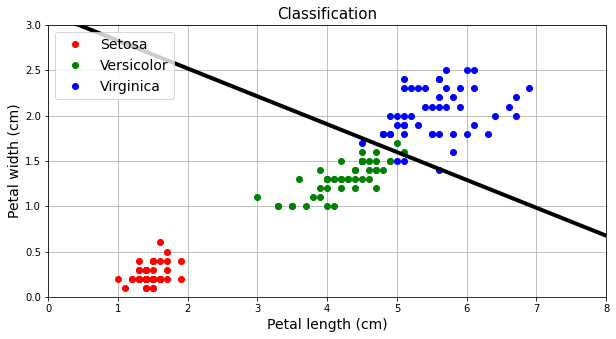

In [85]:
X = iris["data"][:, (2,3)]
y = iris["target"].astype(int)

plt.figure(figsize=(10,5))
plt.plot(X[y == 0, 0], X[y == 0, 1], "ro", label = "Setosa")
plt.plot(X[y == 1, 0], X[y == 1, 1], "go", label = "Versicolor")
plt.plot(X[y == 2, 0], X[y == 2, 1], "bo", label = "Virginica")


x_line = np.array([0,8])
decision_boundary = -(theta3[0] + theta3[1] * x_line) / theta3[2]

plt.plot(x_line, decision_boundary, "k", linewidth = 4)

plt.xlabel("Petal length (cm)", fontsize = 14)
plt.ylabel("Petal width (cm)", fontsize = 14)
plt.legend(loc = "upper left", fontsize = 14)
plt.axis([0, 8, 0, 3])
plt.grid()
plt.title('Classification', fontsize = 15)
plt.show()

# Predicción con los pesos obtenidos

## Fit

In [86]:
X_fit = np.c_[np.ones((len(y_test), 1)), X_test]
y_predicted3 = sigmoid(X_fit @ theta3)

In [87]:
y_test.reshape(1, -1)

array([[1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1]])

In [88]:
(y_predicted3 >= 0.5).astype(int).reshape(1, -1)

array([[0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1]])

In [89]:
(y_predicted3 >= 0.5).astype(int).reshape(1, -1) == y_test.reshape(1, -1)

array([[False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True]])

# Resultado Final One vs One

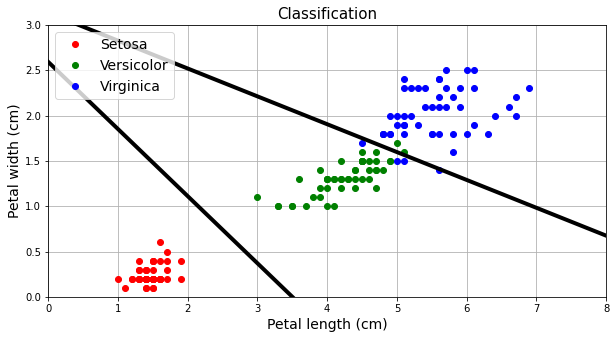

In [90]:
X = iris["data"][:, (2,3)]
y = iris["target"].astype(int)

plt.figure(figsize=(10,5))
plt.plot(X[y == 0, 0], X[y == 0, 1], "ro", label = "Setosa")
plt.plot(X[y == 1, 0], X[y == 1, 1], "go", label = "Versicolor")
plt.plot(X[y == 2, 0], X[y == 2, 1], "bo", label = "Virginica")


x_line = np.array([0,8])
decision_boundary0 = -(theta1[0] + theta1[1] * x_line) / theta1[2]
decision_boundary1 = -(theta3[0] + theta3[1] * x_line) / theta3[2]

plt.plot(x_line, decision_boundary0, "k", linewidth = 4)
plt.plot(x_line, decision_boundary1, "k", linewidth = 4)

plt.xlabel("Petal length (cm)", fontsize = 14)
plt.ylabel("Petal width (cm)", fontsize = 14)
plt.legend(loc = "upper left", fontsize = 14)
plt.axis([0, 8, 0, 3])
plt.grid()
plt.title('Classification', fontsize = 15)
plt.show()

# Matriz de comparación

In [91]:
y_one_vs_one = np.concatenate((y_predicted1, y_predicted2, y_predicted3), axis = 1)

In [92]:
(y_one_vs_one >= 0.5).astype(int)

array([[1, 1, 0],
       [0, 0, 0],
       [1, 1, 1],
       [0, 0, 0],
       [1, 1, 1],
       [0, 0, 0],
       [1, 1, 1],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [1, 1, 1],
       [1, 1, 1],
       [0, 0, 0],
       [1, 1, 1],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [1, 1, 1],
       [1, 1, 1]])

# Softmax

In [93]:
X = iris["data"][:, (2,3)]
y = (iris["target"]).astype(int)

# Obtención de datos de entrenamiento y de prueba

In [94]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.2, random_state=30)

In [95]:
def softmax(datos):
    exp = np.exp(datos - np.max(datos))
    for i in range(len(datos)):
        exp[i] /= np.sum(exp[i])
    return exp

In [96]:
def one_hot_encoder(y, n_classes):
    y_hot = np.zeros((len(y), n_classes))
    y_hot[np.arange(len(y)), y] = 1
    return y_hot

# Clasificación con Softmax y One Hot Encoder

In [97]:
n_iteration = 5500
eta = 0.3
c = 3

m, n = X_train.shape
theta = np.random.random((n, c))
bias = np.random.random(c)

for i in range(n_iteration):
    z = X_train @ theta + bias
    y_hat = softmax(z)
    y_hot = one_hot_encoder(y_train, c)
    gradients = (1/len(y_train)) * (X_train.T @ (y_hat - y_hot))
    b = (1/len(y_train)) * (y_hat - y_hot).sum()
    theta = theta - eta * gradients
    bias = bias - eta * b
theta

array([[  3.96182724,  -0.06325765,  -2.32648133],
       [-12.2345408 ,   3.69154988,  10.40408162]])

# Gráfica de la clasificación

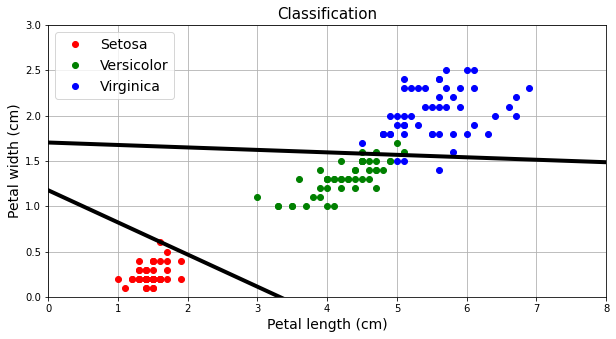

In [101]:
X = iris["data"][:, (2,3)]
y = (iris["target"]).astype(int)

plt.figure(figsize=(10,5))
plt.plot(X[y == 0, 0], X[y == 0, 1], "ro", label = "Setosa")
plt.plot(X[y == 1, 0], X[y == 1, 1], "go", label = "Versicolor")
plt.plot(X[y == 2, 0], X[y == 2, 1], "bo", label = "Virginica")

x1 = np.array([0,8])
decision_boundary_1 = -(theta[0][0] + theta[0][1] * x1)/ theta[0][2]
decision_boundary_2 = -(theta[1][0]  +theta[1][1] * x1)/ theta[1][2]

plt.plot(x1,decision_boundary_1, "k", linewidth = 4)
plt.plot(x1,decision_boundary_2, "k", linewidth = 4)

plt.xlabel("Petal length (cm)", fontsize = 14)
plt.ylabel("Petal width (cm)", fontsize = 14)
plt.legend(loc = "upper left", fontsize = 14)
plt.axis([0, 8, 0, 3])
plt.grid()
plt.title('Classification', fontsize = 15)
plt.show()

# Resultados

In [99]:
y_predicted = softmax(X_test @ theta + bias)
y_predicted = np.argmax(y_predicted, axis=1)

In [100]:
Precision = np.sum(y_test == y_predicted)/len(y_test)
Precision

0.8333333333333334